# ランダムフォレストモデルでトレーニングする

In [ ]:
!pip install numpy scikit-learn joblib
!pip show scikit-learn

In [1]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
data = pd.read_csv(data_path)

# 特徴量のリスト
features = data.columns.tolist()
print(features)


['MSSubClass', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'HeatingQC', 'CentralAir', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'BsmtQual_Cond_Exposure_FinType', 'GarageQual_Cond', 'TotalPorchArea', 'MoSold_sin', 'MoSold_cos', 'YearsSinceBuilt', 'YearsSinceRemod', 'LotFrontage_Capped', 'OverallQual_Capped', 'YearBuilt_Capped', 'YearRemodAdd_Capped', 'MasVnrArea_Capped', 'BsmtFinSF1_Capped', 'log_TotalBsmtSF', 'log_TotalBsmtSF_Capped', 'BsmtUnfSF_Capped', '1stFlrSF_Capped', '2ndFlrSF_Capped', 'log_GrLivArea', 'capped_log_GrLivArea', 'FullBath_Capped', 'TotRmsAbvGrd_Capped', 'Fireplaces_Capped', 'GarageYrBlt_Capped', 'GarageCars_Capped

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation MAE: 18809.4862
Mean Absolute Error (MAE): 17283.7646
Mean Squared Error (MSE): 798768762.0069
R-squared (R2): 0.8581
Root Mean Squared Error (RMSE): 28262.4974
最適なランダムフォレストモデルが /Users/hayakawakazue/Downloads/house_price/model/random_forest_0721_1.joblib に保存されました。
Mean Actual Value: 174050.22831050228
Mean Absolute Percentage Error (MAPE): 9.93%


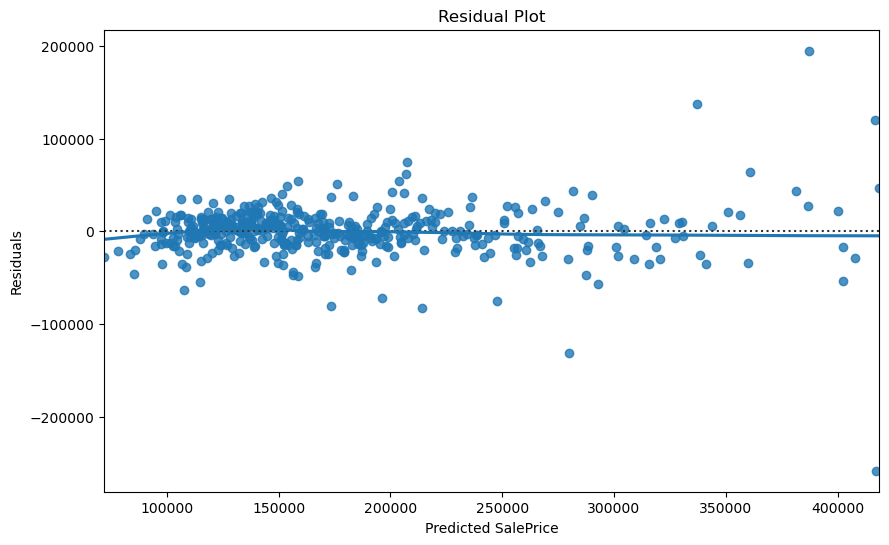

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
data = pd.read_csv(data_path)

# 特徴量の選択
selected_features = [
    'OverallQual_Capped',  'OverallHomeQuality', 'FunctionalSpace', 
    'GarageQuality', 'capped_log_GrLivArea', 'TotalBath_Capped',
    'OverallCond', 'GarageCars_Capped', 'BsmtExposureQual', 'YearBuilt_Capped',
    'BasementQualityInteraction', 'log_TotalBsmtSF_Capped',
    'HouseAge', 'OutdoorSpaceQuality', 'PorchAndDeckArea', 'LotArea' 
]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['SalePrice']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# データの前処理：nanを含む行を削除し、対応する y も削除
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

# ハイパーパラメータの候補を設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt']
}

# ランダムフォレストモデルの定義
model = RandomForestRegressor(random_state=29)

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation MAE: {-grid_search.best_score_:.4f}")

# 最適なモデルを取得
best_model = grid_search.best_estimator_

# テストデータを使った予測
y_pred = best_model.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 最適なモデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/house_price/model', 'random_forest_0721_1.joblib')
joblib.dump(best_model, model_path)
print(f"最適なランダムフォレストモデルが {model_path} に保存されました。")

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)
print(f"Mean Actual Value: {mean_actual_value}")

# 誤差のパーセンテージを計算
error_percentage = (mae / mean_actual_value) * 100
print(f"Mean Absolute Percentage Error (MAPE): {error_percentage:.2f}%")

# 残差プロットの作成
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


# 過学習の有無を計算する

Training Mean Absolute Error (MAE): 13909.7312
Training Mean Squared Error (MSE): 498412708.1884
Training R-squared (R2): 0.9212
Training Root Mean Squared Error (RMSE): 22325.1586


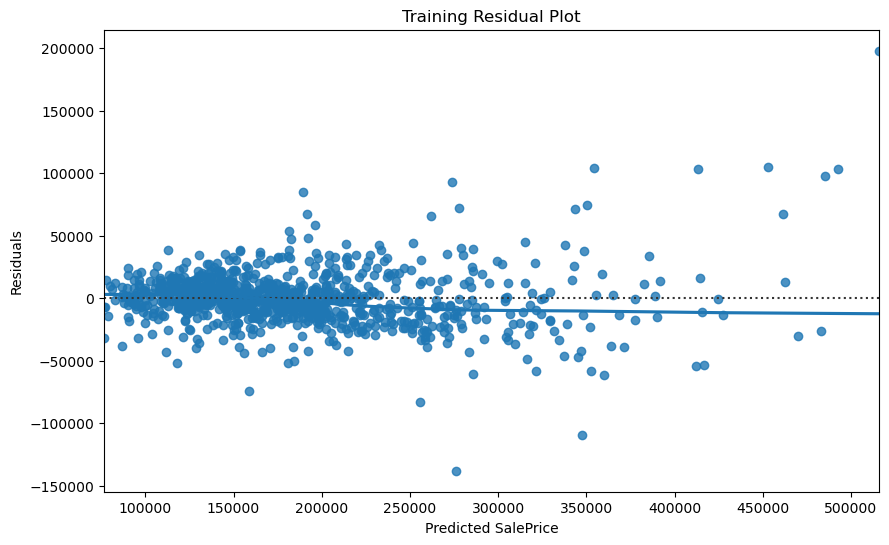

In [3]:
# トレーニングデータを使った予測
y_train_pred = best_model.predict(X_train)

# トレーニングデータの評価指標の計算
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 結果の表示
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse:.4f}")

# 残差プロットの作成（トレーニングデータ）
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=(y_train - y_train_pred), lowess=True)
plt.title('Training Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train_set/train_scaled.csv'
train_df = pd.read_csv(data_path)

# 選択する特徴量と目的変数
selected_features = ['OverallQual', 'TotalArea', 'GrLivArea', 'YearRemodAdd', 'TotalBsmtSF']

# 特徴量と目的変数を分ける
X = train_df[selected_features]
y = train_df['SalePrice']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# ハイパーパラメータの候補を設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt']
}

# ランダムフォレストモデルの定義
model = RandomForestRegressor(random_state=52)

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation MAE: {-grid_search.best_score_:.4f}")

# 最適なモデルを取得
best_model = grid_search.best_estimator_

# テストデータを使った予測（対数スケール）
log_predictions = best_model.predict(X_test)

# 予測値を元のスケールに戻す
predictions = np.exp(log_predictions)

# 実際のSalePriceを元のスケールに戻す
actual_values = np.exp(y_test)

# 元のスケールでの誤差を計算
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

# 結果の表示（元のスケール）
print(f"Mean Absolute Error (MAE) on original scale: {mae:.4f}")
print(f"Mean Squared Error (MSE) on original scale: {mse:.4f}")
print(f"R-squared (R2) on original scale: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse:.4f}")

# 最適なモデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/house_price/model', 'random_forest_0716_test1.joblib')
joblib.dump(best_model, model_path)
print(f"最適なランダムフォレストモデルが {model_path} に保存されました。")


Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation MAE: 0.1173
Mean Absolute Error (MAE) on original scale: 20138.5646
Mean Squared Error (MSE) on original scale: 856877004.5662
R-squared (R2) on original scale: 0.8772
Root Mean Squared Error (RMSE) on original scale: 29272.4615
最適なランダムフォレストモデルが /Users/hayakawakazue/Downloads/house_price/model/random_forest_0716_test1.joblib に保存されました。


In [2]:
def moving_average(predictions, window_size=5):
    smoothed_predictions = pd.Series(predictions).rolling(window=window_size, min_periods=1).mean().values
    return smoothed_predictions

smoothed_predictions = moving_average(predictions, window_size=5)


In [3]:
from scipy.ndimage import median_filter

def median_filter_smoothing(predictions, size=3):
    smoothed_predictions = median_filter(predictions, size=size)
    return smoothed_predictions

smoothed_predictions = median_filter_smoothing(predictions, size=3)


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 予測結果の読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/test_set/submission_0716.csv'
submission_df = pd.read_csv(data_path)

# ローカル回帰（LOESS）を用いたスムージング関数の定義
def loess_smoothing(predictions, frac=0.1):
    lowess = sm.nonparametric.lowess
    smoothed_predictions = lowess(predictions, np.arange(len(predictions)), frac=frac)[:, 1]
    return smoothed_predictions

# スムージングの適用
predictions = submission_df['SalePrice'].values
smoothed_predictions = loess_smoothing(predictions, frac=0.1)

# スムージング後の予測結果を保存
output = pd.DataFrame({'Id': submission_df['Id'], 'SalePrice': smoothed_predictions})

# sample_submission.csv の形式に合わせて保存
submission_path = '/Users/hayakawakazue/Downloads/house_price/test_set/submission_smoothed.csv'
output.to_csv(submission_path, index=False)

print(f"予測結果が {submission_path} に保存されました。")


予測結果が /Users/hayakawakazue/Downloads/house_price/test_set/submission_smoothed.csv に保存されました。


# 移動平均を使用してスムージング

Original Predictions Statistics:
count      1459.000000
mean     176014.450168
std       72227.622484
min       60038.493087
25%      128605.308022
50%      157658.046818
75%      204717.601562
max      511039.550400
Name: SalePrice, dtype: float64

Smoothed Predictions Statistics:
count      1459.000000
mean     175963.721784
std       56593.238827
min       93343.618128
25%      133889.867536
50%      159396.434323
75%      202922.534978
max      418585.157744
dtype: float64
予測結果が /Users/hayakawakazue/Downloads/house_price/test_set/submission_smoothed_ma.csv に保存されました。
Differences between Original and Smoothed Predictions:
count      1459.000000
mean         50.728384
std       47856.906791
min     -195027.389444
25%      -27020.819948
50%       -3305.274778
75%       20891.651772
max      296973.026046
dtype: float64


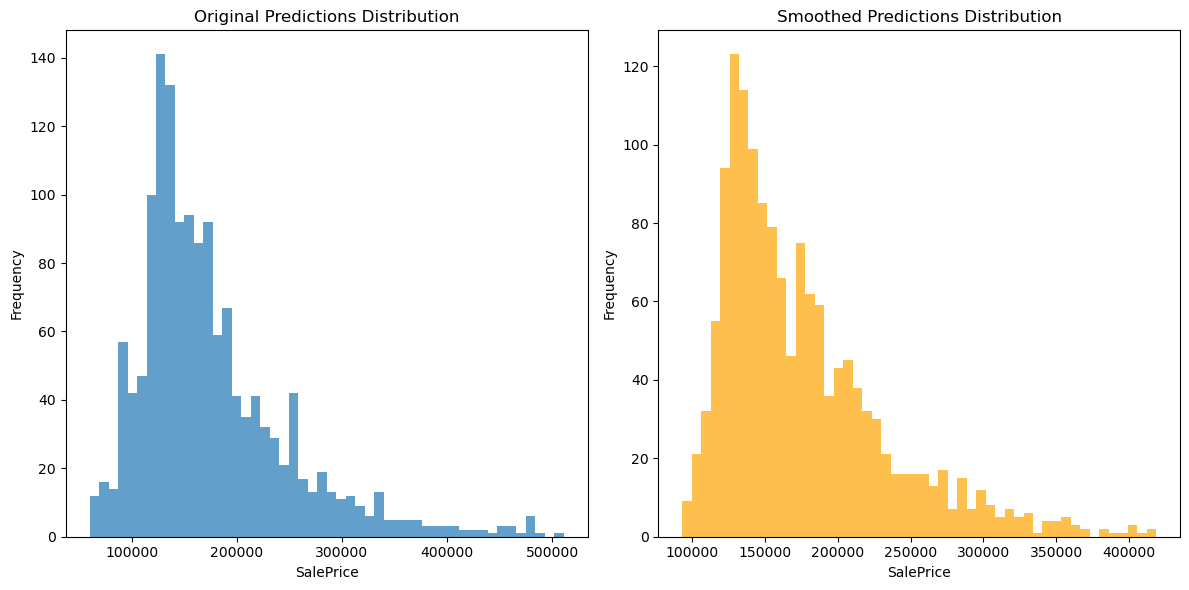

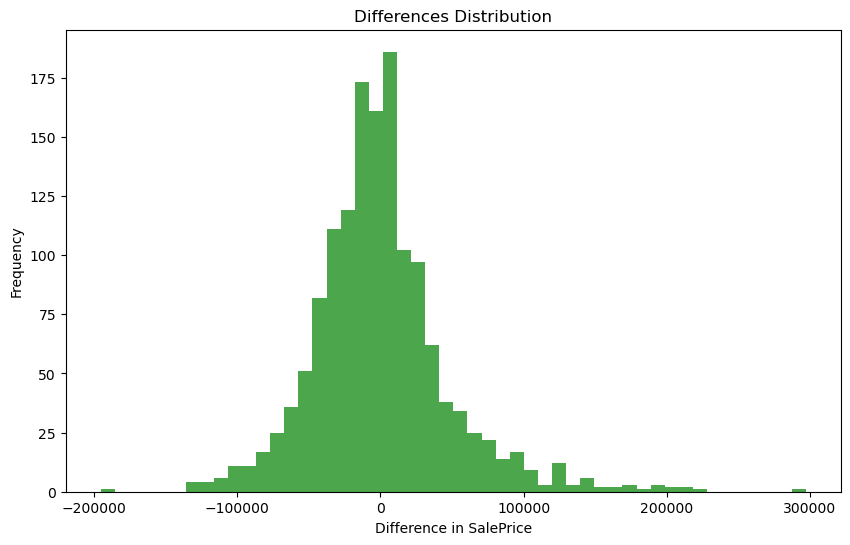

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 予測結果の読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/test_set/submission_0716.csv'
submission_df = pd.read_csv(data_path)

# 移動平均を用いたスムージング関数の定義
def moving_average(predictions, window_size=5):
    smoothed_predictions = pd.Series(predictions).rolling(window=window_size, min_periods=1).mean().values
    return smoothed_predictions

# 移動平均スムージングの適用
predictions = submission_df['SalePrice'].values
smoothed_predictions = moving_average(predictions, window_size=5)

# スムージング後の予測結果の統計量を表示
print("Original Predictions Statistics:")
print(submission_df['SalePrice'].describe())

print("\nSmoothed Predictions Statistics:")
print(pd.Series(smoothed_predictions).describe())

# スムージング後の予測結果を保存
output = pd.DataFrame({'Id': submission_df['Id'], 'SalePrice': smoothed_predictions})
submission_path = '/Users/hayakawakazue/Downloads/house_price/test_set/submission_smoothed_ma.csv'
output.to_csv(submission_path, index=False)

print(f"予測結果が {submission_path} に保存されました。")

# 予測結果の差分を計算
differences = predictions - smoothed_predictions

# 差分の統計量を表示
print("Differences between Original and Smoothed Predictions:")
print(pd.Series(differences).describe())

# 予測結果の散布図をプロットして比較
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(submission_df['SalePrice'], bins=50, alpha=0.7, label='Original Predictions')
plt.title('Original Predictions Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(smoothed_predictions, bins=50, alpha=0.7, label='Smoothed Predictions', color='orange')
plt.title('Smoothed Predictions Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 差分のヒストグラムをプロット
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, alpha=0.7, label='Differences', color='green')
plt.title('Differences Distribution')
plt.xlabel('Difference in SalePrice')
plt.ylabel('Frequency')
plt.show()
